# Import Libraries & Load the Dataset

In [1]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('country_vaccinations.csv')

### Preview the structure (first five rows)

In [3]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


# Data Cleaning

### 1. Basic Data Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              86512 non-null  object 
 1   iso_code                             86512 non-null  object 
 2   date                                 86512 non-null  object 
 3   total_vaccinations                   43607 non-null  float64
 4   people_vaccinated                    41294 non-null  float64
 5   people_fully_vaccinated              38802 non-null  float64
 6   daily_vaccinations_raw               35362 non-null  float64
 7   daily_vaccinations                   86213 non-null  float64
 8   total_vaccinations_per_hundred       43607 non-null  float64
 9   people_vaccinated_per_hundred        41294 non-null  float64
 10  people_fully_vaccinated_per_hundred  38802 non-null  float64
 11  daily_vaccinations_per_milli

### 2.Check For Missing Values

In [5]:
df.isnull().sum()   

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     42905
people_vaccinated                      45218
people_fully_vaccinated                47710
daily_vaccinations_raw                 51150
daily_vaccinations                       299
total_vaccinations_per_hundred         42905
people_vaccinated_per_hundred          45218
people_fully_vaccinated_per_hundred    47710
daily_vaccinations_per_million           299
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

### 3. Filling Missing Values

In [9]:
df['daily_vaccinations']= df['daily_vaccinations'].fillna(0)    
df['people_vaccinated']= df['people_vaccinated'].fillna(0)
df['people_fully_vaccinated']= df['people_fully_vaccinated'].fillna(0)
df['total_vaccinations']= df['total_vaccinations'].fillna(0)

### 4.Convert Dates For Time Series

In [10]:
df['date'] = pd.to_datetime(df['date']) 

### Checking the details 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              86512 non-null  object        
 1   iso_code                             86512 non-null  object        
 2   date                                 86512 non-null  datetime64[ns]
 3   total_vaccinations                   86512 non-null  float64       
 4   people_vaccinated                    86512 non-null  float64       
 5   people_fully_vaccinated              86512 non-null  float64       
 6   daily_vaccinations_raw               35362 non-null  float64       
 7   daily_vaccinations                   86512 non-null  float64       
 8   total_vaccinations_per_hundred       43607 non-null  float64       
 9   people_vaccinated_per_hundred        41294 non-null  float64       
 10  people_ful

#### now in upper case now also many of them finds null in some columns but as we dont need the in our ferther work so we can leav it as it is or we can also remove that columns but for future use case i am leaving is as is is 

# EDA + Visualizations

### 1.Line Chart

In [12]:
india = df[df['country'] == 'India']


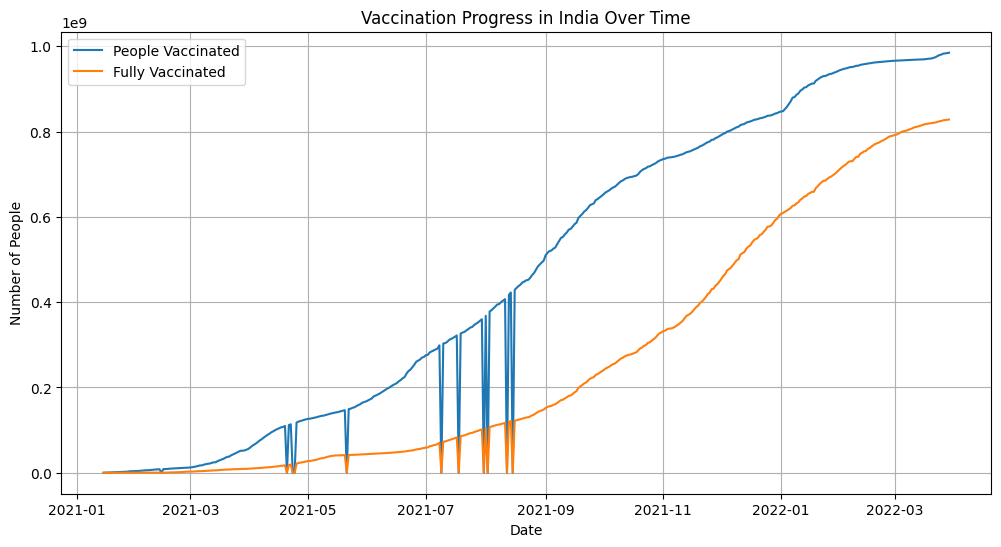

In [13]:
plt.figure(figsize=(12,6))
plt.plot(india['date'], india['people_vaccinated'], label='People Vaccinated')
plt.plot(india['date'], india['people_fully_vaccinated'], label='Fully Vaccinated')
plt.title('Vaccination Progress in India Over Time')
plt.xlabel('Date')
plt.ylabel('Number of People')
plt.legend()
plt.grid(True)


### 2.Pie Chart

In [14]:
latest = df[df['date'] == df['date'].max()]
top5 = latest.groupby('country')['total_vaccinations'].max().nlargest(5)


Text(0.5, 1.0, 'Top 5 Countries by Total Vaccinations')

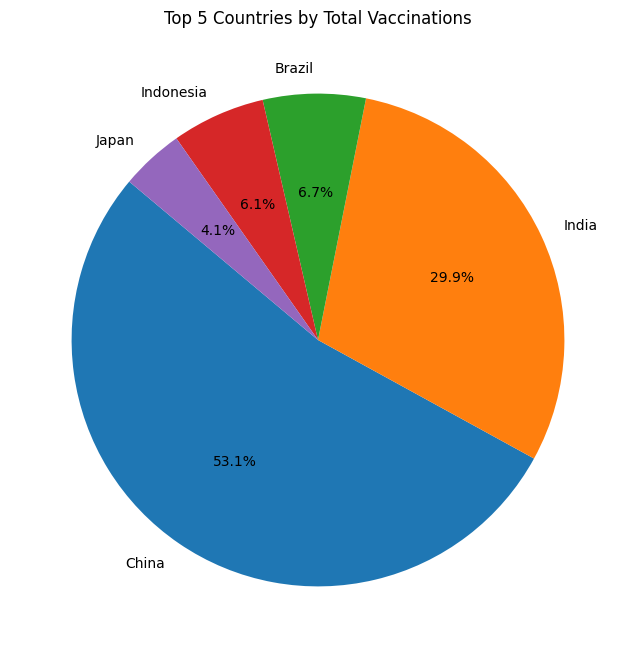

In [15]:
plt.figure(figsize=(8,8))
plt.pie(top5, labels=top5.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Countries by Total Vaccinations')


### 3.Doughnut Chart

In [16]:
vaccine_counts = df['vaccines'].value_counts().head(5)


Text(0.5, 1.0, 'Top 5 Vaccine Types Used (Doughnut Chart)')

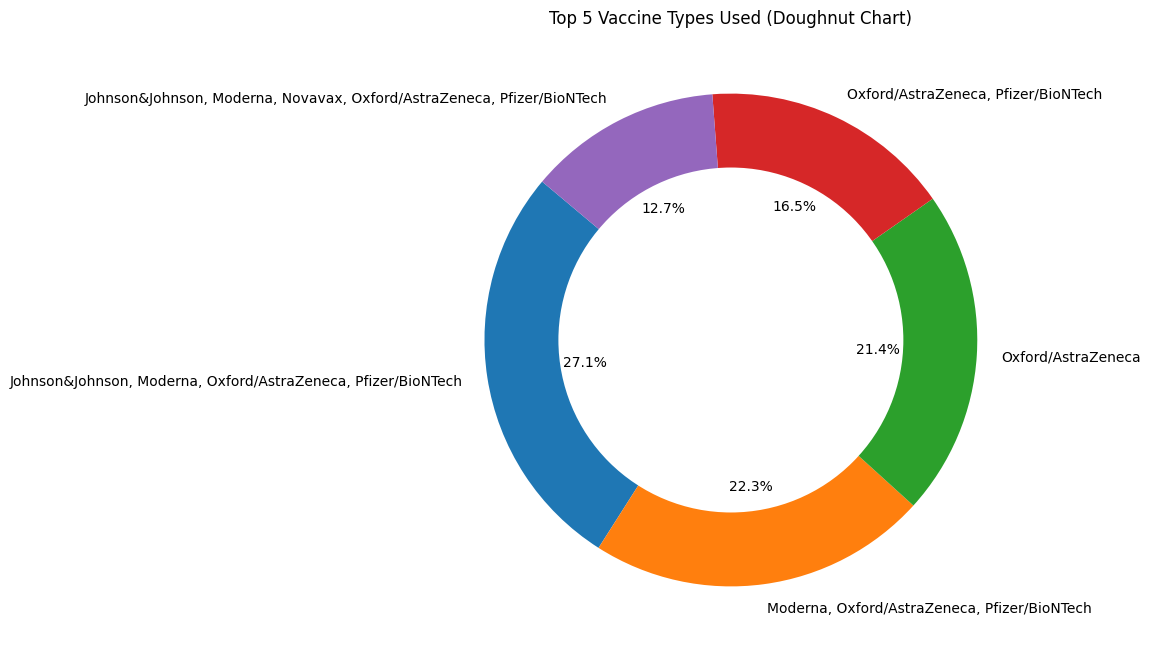

In [17]:
plt.figure(figsize=(8,8))
wedges, texts, autotexts = plt.pie(vaccine_counts, labels=vaccine_counts.index, autopct='%1.1f%%', startangle=140)
centre_circle = plt.Circle((0,0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)
plt.title('Top 5 Vaccine Types Used (Doughnut Chart)')


### 4.Bar Chart - Last 30 days

In [18]:
latest_india = india.sort_values('date').tail(30)


Text(0.5, 1.0, 'Daily Vaccinations in India (Last 30 Days)')

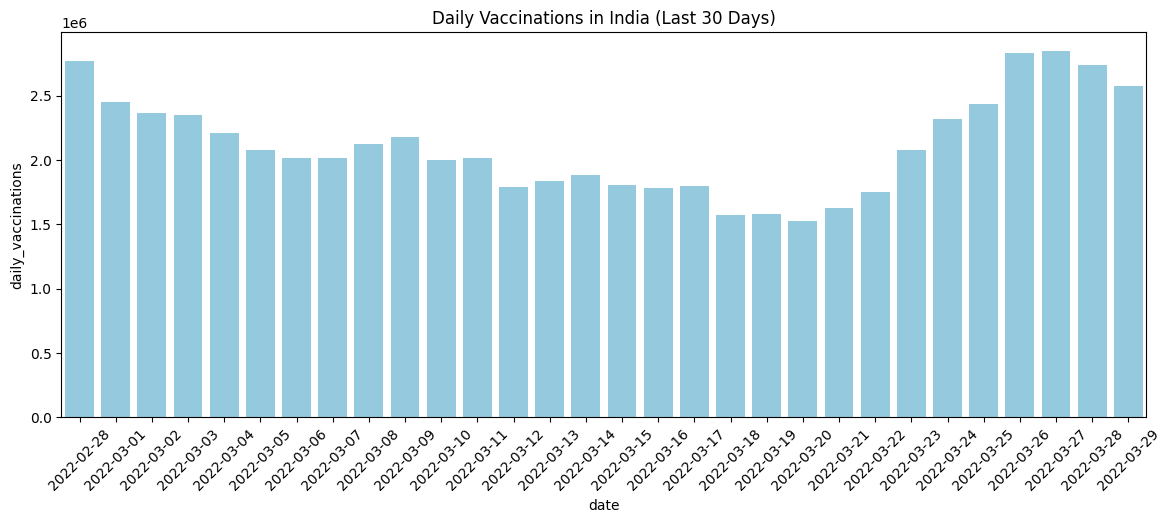

In [19]:
plt.figure(figsize=(14,5))
sns.barplot(x='date', y='daily_vaccinations', data=latest_india, color='skyblue')
plt.xticks(rotation=45)
plt.title('Daily Vaccinations in India (Last 30 Days)')


### 5.HEATMAP-Correlation

In [20]:
df_num = df[['daily_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']]


Text(0.5, 1.0, 'Correlation Between Vaccination Metrics')

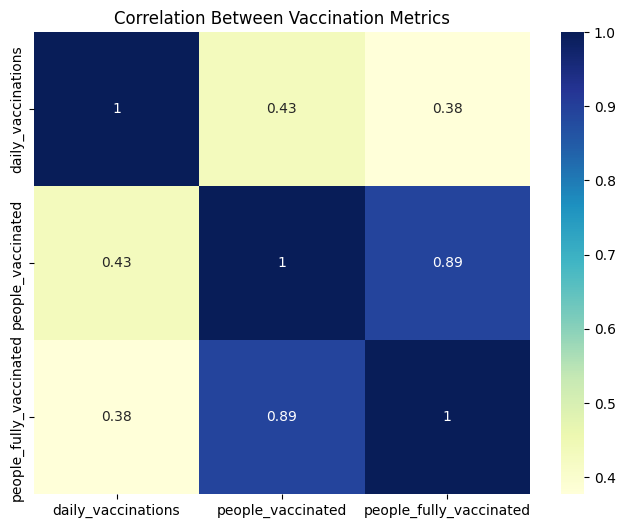

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(df_num.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Between Vaccination Metrics')
